In [1]:
## LOADING BASIC PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
## DEFINING A RANDOM PRCESS
#stochastic game you gain Rs 1 when heads come
# While you lose one while tail comes
# You can choose the number of times
# the game has to be played
toss=('H','T')
def gameplay(trial=10):
  toss=('H','T')
  gameplay=[]
  for iter in range(trial):
    if random.choice(toss)=='H':
      gameplay.append(1)
    else:
      gameplay.append(-1)
  return gameplay

Text(0,0.5,'Won/loss')

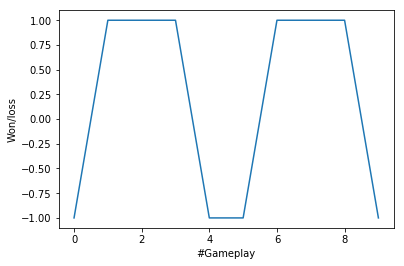

In [3]:
## PLOTTING TIMESERIES FOR RANDOM PROCESS
# lets plot the outcome of 10 gameplay of stochatic coin toss game
plt.plot(gameplay())
plt.xlabel('#Gameplay')
plt.ylabel('Won/loss')

In [4]:
## DEFINING MORE RANDOM PROCESS
# Now lets try to visualize what is my final payoff( i.e. all cumulative earnings and loosing )
def payoff(gameplay=gameplay):
  import numpy as np
  return np.cumsum(gameplay)

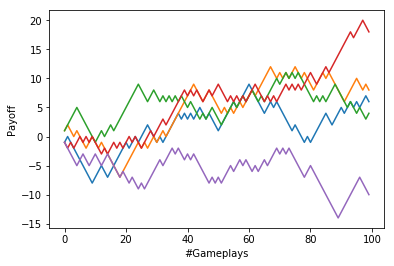

In [5]:
## TIME SERIES BASED ON RANDOM PROCESS
# Here lets play stochastic game 5 times
# With 100 turns in each game
# At each point what is your total payoff is being plotted
for i in range(5):
  plt.plot(payoff(gameplay=gameplay(100)),label='Game {}'.format(i+1))
  plt.ylabel('Payoff')
  plt.xlabel('#Gameplays')
# It is evident that even this simple game of coin toss 
# can lead to such uncertainity

In [6]:
## WHAT IS STATIONARITY? HOW TO CHECK IT?
# I would encourage you to play this game several times with longer gameplays
# You would see patterns emerge that are against our intution of randomness
# Some will be clear positive streaks of payoff and would look like a sure investment
# While others would be on a loosing streak
# But most importantly majority of time payoffs will be around 0 
# This behavior of reverting back to around mean is known as mean-reversion

This behaviour of mean reversion is important that it provides us with an opportunity to expoit
But more on that later, first we have to make sure our time series is mean-reverting or more correctly as called in mathematical circles as stationary.
We perform following tests to check out the stationarity.
1. Unit Test
2. Augmented Dickey-Fuller (ADF)

Text(0.5,1,'Payoff in 500 gameplays')

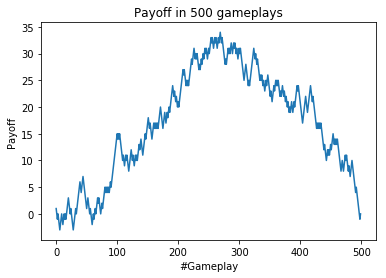

In [7]:
# Lets start with the ADF
# We will be importing some packages for the test
# setting out a seed to have a constant time series
random.seed(100)
ts=payoff(gameplay=gameplay(500))
plt.plot(ts)
plt.xlabel('#Gameplay')
plt.ylabel('Payoff')
plt.title('Payoff in 500 gameplays')


In [8]:
#from statsmodels.tsa.stattools import adfuller
#print(adfuller(ts))

In [9]:
# For now skip how we defined this
# Treat it as all now black box
# We will be back here shortly
class stationarity:
    
    def __init__(self,significance=0.05):
      self.SignificanceLevel= significance
      self.pValue=None
      self.isStationary = None
      
    def __repr__(self):
      if self.isStationary:
        return "Null hypothesis rejected at significane level of {}. Stationarity is supported".format(self.SignificanceLevel)
      else:
        return "Failed to reject the null hypothesis at significane level of {}. Stationarity cannot be supported".format(self.SignificanceLevel)  
          
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
      from statsmodels.tsa.stattools import adfuller
        #Dickey-Fuller test:
      adfTest = adfuller(timeseries, autolag='AIC')
        
      self.pValue = adfTest[1]
        
      if (self.pValue<self.SignificanceLevel):
        self.isStationary = True
      else:
        self.isStationary = False
        
      if printResults:
        dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

            #Add Critical Values
        for key,value in adfTest[4].items():
          dfResults['Critical Value (%s)'%key] = value

        print('Augmented Dickey-Fuller Test Results:')
        print(dfResults)

In [10]:
sTest= stationarity()
sTest.ADF_Stationarity_Test(ts, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.174052
P-Value                   0.684657
# Lags Used              12.000000
# Observations Used     487.000000
Critical Value (1%)      -3.443849
Critical Value (5%)      -2.867493
Critical Value (10%)     -2.569941
dtype: float64
Is the time series stationary? False


In [11]:
# Isn't it shocking!!
# The series is NOT STATIONARY.
# We have to re-think our hypothesis.
# But, what is this series called?

In [12]:
# These so called series are called "Random Walk"
# I believe you all might have heard about famous book "random walk down the street"
# Which emphasis that financial time series are "Random Walks"
# As name suggests, random walks are time series which have no emerging patterns 
# That you can not guess by looking at series whether the next value in series
# will be previous value plus positive or negative
# These series are modelled as X(t) = X(t-1)+ Error(t) 
# Here the Error is usually taken as gaussian (white noise)
# Obviously, this linear relationship can go an affine transformation
# i.e. we can model X(t) = slope*X(t-1)+ Error(t)
# Where if slope=1, we get earlier case 
# and, if slope=0 we get the noise back
# Oh, before moving forward lets check is noise is stationary 

In [13]:
sTest.ADF_Stationarity_Test([np.random.rand() for i in range(1000)],printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -20.874663
P-Value                   0.000000
# Lags Used               1.000000
# Observations Used     998.000000
Critical Value (1%)      -3.436919
Critical Value (5%)      -2.864440
Critical Value (10%)     -2.568314
dtype: float64
Is the time series stationary? True


In [14]:
# Oh. Nice. Gaussian (White Noise) or the so called error term is stationary
# I thank the gods of statistics. We dont have to worry about random noise
# Recall, our modified random walk generating process:
# Where, X(t) = slope*X(t-1) + noise
# Here we observe if slope is ZERO . We have stationarity
# Now, What would be my obvious check to establish stationarity.
# If X(t) cannot be modelled as being dependent on X(t-1) or previous terms
# Which means to have slope = 0 or NOT SIGNIFICANTLY DIFFERENT from zero.

In [15]:
# This X(t-1) means lag of one
# X(t-2) would be 2nd lag term and so on
# so , if i say use lag 3 what it would mean
# X(t) = slope1*X(t-1) + slope2*X(t-2) + slope3*X(t-3) + noise 
# This is what we meant by lag in ADF test

In [16]:
# To establish that slope is zero or NOT SIGNIFICANTLY DIFFERENT from zero
# we try to plot X(t) as a function of X(t-1) and observe the slope
# if slope is zero . We have stationary and I thank the Gods of Statistics
# But, if slope is non -zero but is quite small. We cannot say it is 
# NOT SIGNIFICANTLY DIFFERENT from zero . To please gods of statistics
# We will perform hypothesis testing
# This is where we define the significane level and no of observations used
# Please refer to wiki link 
#https://en.wikipedia.org/wiki/Statistical_hypothesis_testing
# Or if you find logic and theory more intriguing without maths involved
# read book The cartoon guide to statistics

In [17]:
# For now I am skipping what is 'AIC'. 
# Don't worry that is not important at present.

In [18]:
# BUT, The important question is why was our payoff from stochastic game of chance 
# is not stationary? AND, how to make it stationar? Which is useful as it is mean reverting.
# I would let you guys ponder the answer on the first question.
# We will try to work on second question.

In [19]:
# X(t) - X(t-1)*slope = noise
# Well lets try taking 1st difference of our time series
# As that output would resemble more like a noise at least mathematically
# lets see

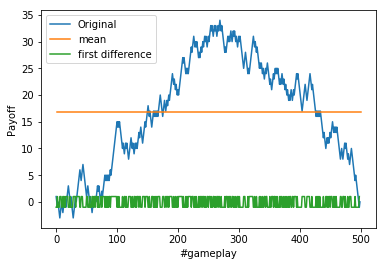

In [20]:
ts_diff = np.diff(ts)
plt.plot(ts,label='Original')
plt.plot(range(1,len(ts)+1),[np.mean(ts) for i in range(len(ts))],label='mean')
plt.plot(ts_diff,label='first difference')
plt.xlabel('#gameplay')
plt.ylabel('Payoff')
_=plt.legend()

In [21]:
# This first difference is stationary
# Which is nothing just the independent event of stochastic coin toss
# that we played originally to arrive at the payoff
# For now do remember this first difference in equivalent to daily return
# While the price (close/open) is equivalent to the payoff we have
# So, daily return is more likely to be stationary 
# Here we have taken absolute difference as returns
# While in practice absolute/% returns may be stationary 

In [22]:
# Importing real life stock prices
df= pd.read_csv("../input/BajaHolding.csv",parse_dates=['Date'])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJAJHLDNG,EQ,2018-02-09,2709.75,2651.10,2704.95,2631.00,2695.00,2693.80,2685.89,6149,1.651551e+07,1494,3814,62.03
1,BAJAJHLDNG,EQ,2018-02-12,2693.80,2682.05,2715.00,2682.05,2686.15,2689.90,2691.79,11220,3.020191e+07,719,10220,91.09
2,BAJAJHLDNG,EQ,2018-02-14,2689.90,2708.90,2785.00,2700.10,2755.00,2743.40,2727.52,33172,9.047733e+07,1738,30307,91.36
3,BAJAJHLDNG,EQ,2018-02-15,2743.40,2757.00,2759.95,2727.65,2750.00,2749.25,2749.11,43980,1.209059e+08,3267,40741,92.64
4,BAJAJHLDNG,EQ,2018-02-16,2749.25,2732.05,2750.00,2728.00,2745.00,2738.10,2739.47,9992,2.737283e+07,1519,8295,83.02


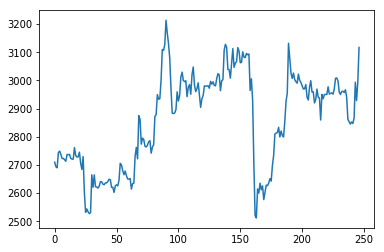

In [23]:
# df is the dataframe with price/volume data for stock name BajajHolding
# lets plot the close price and get a feel
df['Prev Close'].plot()

In [24]:
# lets see if the series is stationary
sTest.ADF_Stationarity_Test(df['Prev Close'],printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -2.218880
P-Value                   0.199464
# Lags Used               1.000000
# Observations Used     245.000000
Critical Value (1%)      -3.457326
Critical Value (5%)      -2.873410
Critical Value (10%)     -2.573096
dtype: float64
Is the time series stationary? False


In [25]:
# lets try to see if the 1st difference 
# or % change of 1st difference ( i.e. daily return )
# is stationary or not
# lets break the series in two parts called train and test sample
df['1dretun']=df['Prev Close'].pct_change()
train=df['1dretun'].iloc[:-60]
trainclose=df['Prev Close'].iloc[:-60]
test=df['1dretun'].iloc[-60:]
testclose=df['Prev Close'].iloc[-60:]

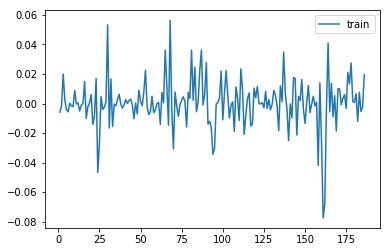

In [26]:
train.plot(label='train')
plt.legend()

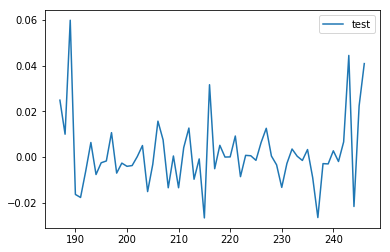

In [27]:
test.plot(label='test')
plt.legend()

In [28]:
# This looks more like something we have close to might be stationary
sTest.ADF_Stationarity_Test(train.dropna(),printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.194432e+01
P-Value                 4.466988e-22
# Lags Used             0.000000e+00
# Observations Used     1.850000e+02
Critical Value (1%)    -3.466201e+00
Critical Value (5%)    -2.877293e+00
Critical Value (10%)   -2.575168e+00
dtype: float64
Is the time series stationary? True


In [29]:
# what about our test series 
sTest.ADF_Stationarity_Test(test,printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -7.877512e+00
P-Value                 4.799856e-12
# Lags Used             0.000000e+00
# Observations Used     5.900000e+01
Critical Value (1%)    -3.546395e+00
Critical Value (5%)    -2.911939e+00
Critical Value (10%)   -2.593652e+00
dtype: float64
Is the time series stationary? True


In [30]:
#Well our time series is stationary in test and train sample
# lets try to have a strategy 
# lets see what is the mean return and risk ( standard deviation )
# we observe in train series
train.describe()
# we observe mean return is .0412%
np.mean(train)*100

0.041199512686804905

In [31]:
# lets use the basic strategy
# Stock when have previous day return above 2 times the std we short the stock
# while we buy the stock when its previous day return is 2 times below the stock std

In [32]:
std1= np.std(train)
print('Std for train series  is {}%'.format(std1*100))

Std for train series  is 1.6242090548763803%


In [33]:
# Not writing an elaborate program
# But a very intutitve one
buydays=[]
shortdays=[]
for day in range(2,len(train)):
  if train[day-1] > 2*std1:
    # i.e. if the previous day return is way above the
    # 2 times the historical variation we short the stock
    shortdays.append(day-1)
  elif train[day-1]<-2*std1:
    # i.e. if the previous day return is below
    # 2 times the historical variation 
    # we take long positions on the stock
    buydays.append(day-1)
    

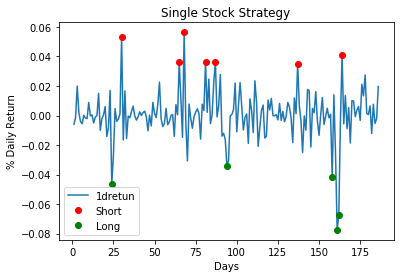

In [34]:
# Visualizing our strategy on train sample
plt.plot(train)
plt.plot(shortdays,[train[d] for d in shortdays],'ro',label='Short')
# short timing is plotted as red dots
plt.plot(buydays,[train[d] for d in buydays],'go',label='Long')
# long timing is plotted as green dots
plt.xlabel('Days')
plt.ylabel('% Daily Return')
plt.title('Single Stock Strategy')
_=plt.legend()

In [35]:
shortdays=[]
buydays=[]
# Testing on our test data
for day in test.index:
  if test[day] > 2*std1:
    # i.e. if the previous day return is way above the
    # 2 times the historical variation we short the stock
    shortdays.append(day)
  elif test[day]<-2*std1:
    # i.e. if the previous day return is below
    # 2 times the historical variation 
    # we take long positions on the stock
    buydays.append(day)
    

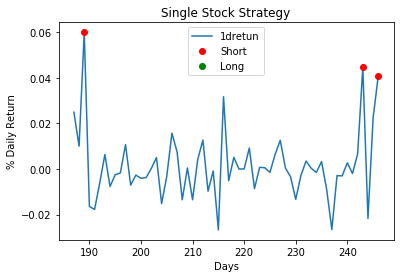

In [36]:
# Visualizing our strategy on test sample
plt.plot(test)
plt.plot(shortdays,[test[d] for d in shortdays],'ro',label='Short')
# short timing is plotted as red dots
plt.plot(buydays,[test[d] for d in buydays],'go',label='Long')
# long timing is plotted as green dots
plt.xlabel('Days')
plt.ylabel('% Daily Return')
plt.title('Single Stock Strategy')
_=plt.legend()

In [37]:
# Thats all for now.
# Next time we will pickup 
# How to calculate realised and unrealised pnl
# Moving on from single stock strategy to pair trading 
# And portfolio optimization 
# Finally,common Pitfalls and wayarounds 